# Moduel 7.5: Practice Notebook on Module 07 Data Preprocessing and Feature Engineering

## Dataset Options

7. Students Performance Dataset  
   https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset  
---

## Section 13 — Handling Missing Values

In [3]:
# TODO
# Find Missing Values of your Dataset
# Identify which way you should impute those missing values (if any)
# Apply the methods to impute missing values (if any)

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set(font_scale=1.1)

In [5]:

df = pd.read_csv("Student_performance_data _.csv")

df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [6]:
df.shape

(2392, 15)

In [7]:
df.nunique()

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

In [10]:
df.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [12]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


## Section 14 — Encoding Categorical Variables

In [ ]:
# TODO
# Identify categorical features
# Take decision on what encoding will you apply for each categorical features
# Apply the methods to encode the features and show final data

In [13]:
categorical_col = ['Gender', 'Ethnicity',	'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
categorical_col

['Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GradeClass']

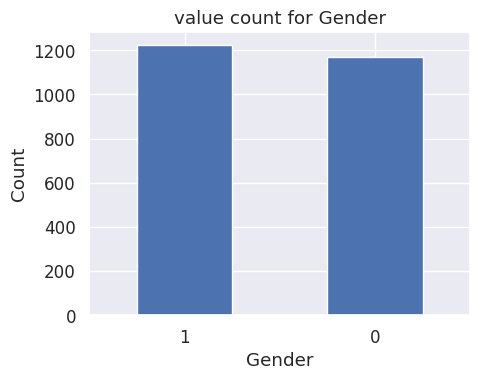

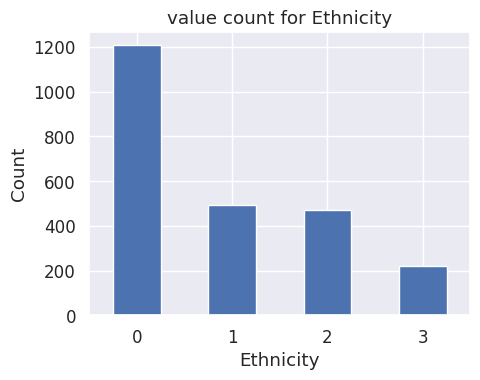

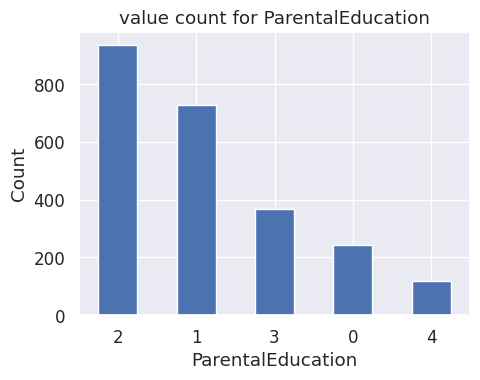

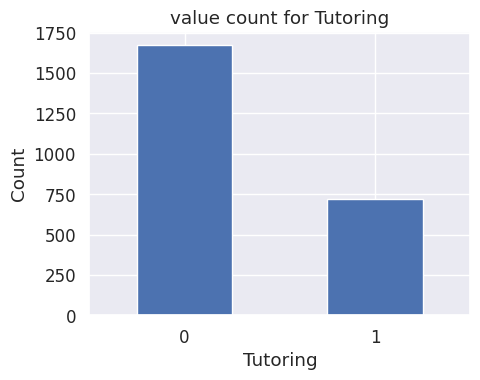

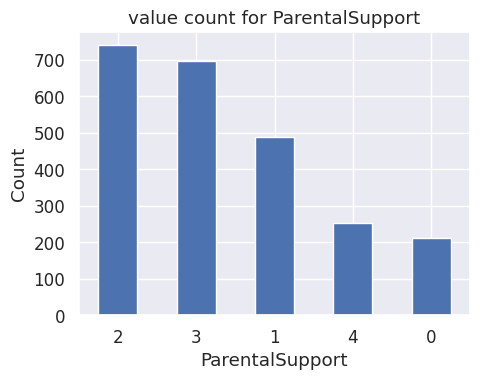

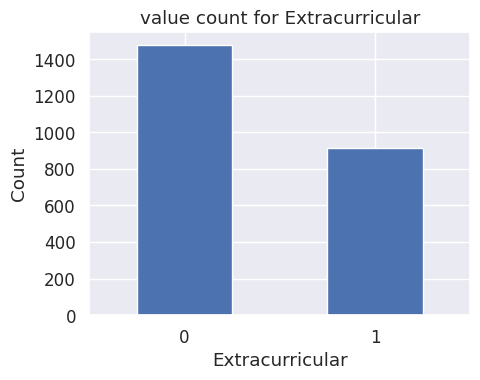

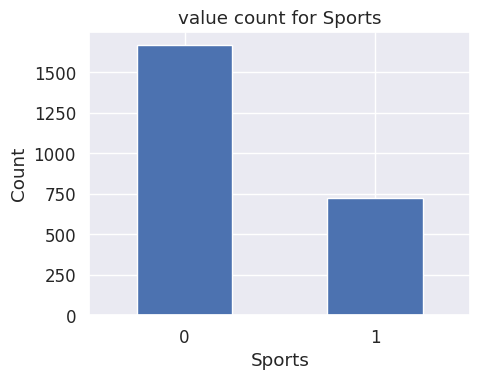

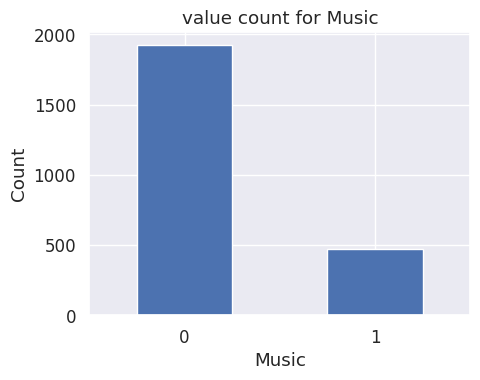

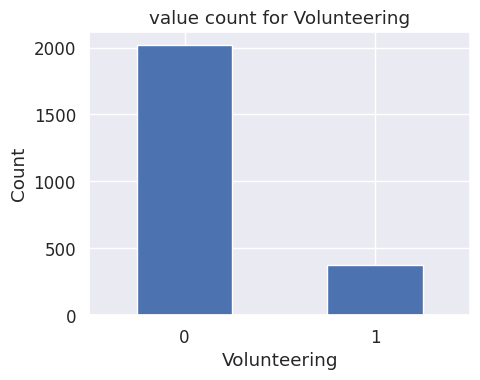

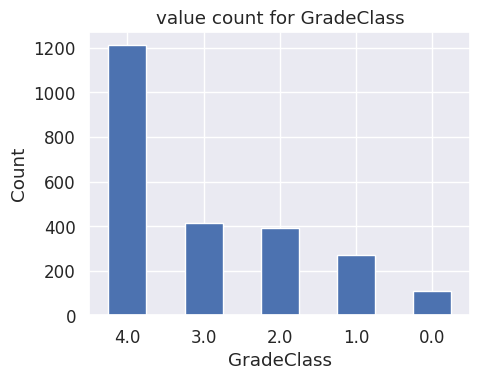

In [14]:
for c in categorical_col:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind='bar')
  plt.title(f"value count for {c}")
  plt.ylabel("Count")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

In [ ]:
# Categorical data are already in numeric


## Section 15 — Normalization and Scaling

In [8]:
numerical_col = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
numerical_col

['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tar_col = 'GradeClass'

x = df.drop(columns=[tar_col])
y = df[tar_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Standard Scalling
scaler_sd = StandardScaler()
x_train_std = scaler_sd.fit_transform(x_train)
x_test_std = scaler_sd.transform(x_test)

# MinMax Scaling
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train) # mean snd SD will be calculated from x_train
x_test_mm = scaler_mm.transform(x_test)

print("-----Display Standard Scaling Data-----")

# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_std_df = pd.DataFrame(x_train_std, columns= x_train.columns, index = x_train.index)
x_test_std_df = pd.DataFrame(x_test_std, columns= x_test.columns, index = x_test.index)

display(x_train_std_df.head())
display(x_test_std_df.head())

print()
print("-----Display Min-Max Scaling Data-----")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_mm_df = pd.DataFrame(x_train_mm, columns= x_train.columns, index = x_train.index)
x_test_mm_df = pd.DataFrame(x_test_mm, columns= x_test.columns, index = x_test.index)

display(x_train_mm_df.head())
display(x_test_mm_df.head())

-----Display Standard Scaling Data-----


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
962,-0.337391,-0.409812,-1.028270,-0.843405,0.234157,0.184066,-1.605030,-0.653611,0.773247,1.284495,-0.658827,2.009807,-0.426401,1.451143
1053,-0.205119,0.482424,0.972507,0.128380,0.234157,0.135451,1.684263,-0.653611,-1.007504,1.284495,-0.658827,-0.497560,-0.426401,-1.632246
1058,-0.197852,-0.409812,0.972507,-0.843405,-1.795205,-1.368727,-1.135131,-0.653611,0.773247,1.284495,-0.658827,-0.497560,-0.426401,1.138752
8,-1.724062,0.482424,-1.028270,-0.843405,-1.795205,-0.907934,-1.605030,-0.653611,-0.117129,-0.778516,1.517850,-0.497560,2.345208,1.093735
316,-1.276373,0.482424,0.972507,-0.843405,0.234157,-0.525948,1.449314,-0.653611,1.663623,-0.778516,-0.658827,-0.497560,-0.426401,-1.477718


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
1004,-0.276342,-1.302047,0.972507,1.100164,2.263520,-1.685315,0.274566,-0.653611,-0.117129,-0.778516,1.517850,2.009807,2.345208,-0.505423
196,-1.450797,-0.409812,0.972507,-0.843405,2.263520,-1.359669,-1.722505,-0.653611,-1.007504,1.284495,-0.658827,-0.497560,2.345208,1.333795
2342,1.668486,-1.302047,-1.028270,-0.843405,-1.795205,0.150538,0.039617,-0.653611,0.773247,-0.778516,-0.658827,-0.497560,2.345208,0.158630
1708,0.746945,1.374660,0.972507,0.128380,0.234157,1.137569,-1.605030,-0.653611,0.773247,1.284495,-0.658827,-0.497560,-0.426401,1.803133
435,-1.103403,1.374660,-1.028270,-0.843405,-1.795205,-1.080962,1.449314,-0.653611,-1.007504,-0.778516,1.517850,-0.497560,-0.426401,-1.788528



-----Display Min-Max Scaling Data-----


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
962,0.402342,0.333333,0.0,0.000000,0.5,0.539648,0.034483,0.0,0.75,1.0,0.0,1.0,0.0,0.806290
1053,0.440402,0.666667,1.0,0.333333,0.5,0.525781,1.000000,0.0,0.25,1.0,0.0,0.0,0.0,0.098137
1058,0.442493,0.333333,1.0,0.000000,0.0,0.096707,0.172414,0.0,0.75,1.0,0.0,0.0,0.0,0.734544
8,0.003346,0.666667,0.0,0.000000,0.0,0.228151,0.034483,0.0,0.50,0.0,1.0,0.0,1.0,0.724205
316,0.132162,0.666667,1.0,0.000000,0.5,0.337114,0.931034,0.0,1.00,0.0,0.0,0.0,0.0,0.133627


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
1004,0.419908,0.000000,1.0,0.666667,1.0,0.006399,0.586207,0.0,0.50,0.0,1.0,1.0,1.0,0.356931
196,0.081974,0.333333,1.0,0.000000,1.0,0.099291,0.000000,0.0,0.25,1.0,0.0,0.0,1.0,0.779339
2342,0.979506,0.000000,0.0,0.000000,0.0,0.530084,0.517241,0.0,0.75,0.0,0.0,0.0,1.0,0.509442
1708,0.714345,1.000000,1.0,0.333333,0.5,0.811639,0.034483,0.0,0.75,1.0,0.0,0.0,0.0,0.887130
435,0.181932,1.000000,0.0,0.000000,0.0,0.178794,0.931034,0.0,0.25,0.0,1.0,0.0,0.0,0.062244
